In [1]:
import os
import glob
import datetime as dt
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

from concurrent import futures
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
from scipy.stats import gaussian_kde
# from talib import BBANDS, RSI, ICHIMOKU

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.graph_objects as go

#import plotly.tools as tls
#import plotly.io as pio
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

""" set output directory """
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)


In [2]:
""" datetime util """
now = dt.datetime.now()
lastday = now + relativedelta(months=0, days=-1)
firstday_of_this_month = dt.datetime(now.year, now.month, 1)
lastday_of_this_month = dt.datetime(now.year, now.month, 1) + relativedelta(months=1, days=-1)
firstday_of_last_month = dt.datetime(now.year, now.month, 1) + relativedelta(months=-1, days=0)
lastday_of_last_month = dt.datetime(now.year, now.month, 1) + relativedelta(months=0, days=-1)

In [3]:
""" set the download window """
start_date = "2017-01-01"
end_date = lastday.strftime('%Y-%m-%d')

In [4]:
df = pd.DataFrame() # Empty DataFrame

# load data into dataframe
df = pd.read_csv('./data/txn/2023-01-17_AAP.csv')
df.rename(columns={"Date": "datetime", "Open": "open", "High": "high", "Low": "low", "Close": "close" }, inplace=True)

# OR if you have yfinance installed
# df = df.ta.ticker("aapl")

# VWAP requires the DataFrame index to be a DatetimeIndex.
# Replace "datetime" with the appropriate column from your DataFrame
df.set_index(pd.DatetimeIndex(df["datetime"]), inplace=True)

# Calculate Returns and append to the df DataFrame
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

# New Columns with results
df.columns

# Take a peek
df.tail()

# vv Continue Post Processing vvimport pandas as pd
import pandas_ta as ta

df = pd.DataFrame() # Empty DataFrame

# load data into dataframe
df = pd.read_csv('./data/txn/2023-01-17_AAP.csv')
df.rename(columns={"Date": "datetime", "Open": "open", "High": "high", "Low": "low", "Close": "close" }, inplace=True)

# OR if you have yfinance installed
# df = df.ta.ticker("aapl")

# VWAP requires the DataFrame index to be a DatetimeIndex.
# Replace "datetime" with the appropriate column from your DataFrame
df.set_index(pd.DatetimeIndex(df["datetime"]), inplace=True)

# Calculate Returns and append to the df DataFrame
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

# New Columns with results
df.columns

# Take a peek
df.tail()

# vv Continue Post Processing vv

,datetime,open,high,low,close,Adj Close,Volume,Name,CUMLOGRET_1,CUMPCTRET_1
datetime,,,,,,,,,,
2023-01-09,2023-01-09,154.029999,155.119995,152.149994,152.259995,152.259995,781200,AAP,-0.113732,-0.107503
2023-01-10,2023-01-10,152.000000,153.630005,151.279999,151.970001,151.970001,642700,AAP,-0.115639,-0.109203
2023-01-11,2023-01-11,152.679993,154.869995,152.660004,153.279999,153.279999,590300,AAP,-0.107055,-0.101524
2023-01-12,2023-01-12,152.919998,153.339996,148.899994,152.190002,152.190002,997500,AAP,-0.114192,-0.107913
2023-01-13,2023-01-13,150.350006,152.000000,149.750000,151.029999,151.029999,832700,AAP,-0.121843,-0.114713


In [5]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [6]:
# Create your own Custom Strategy
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
        {"kind": "ichimoku"},
    ]
)
# To run your "Custom Strategy"
df.ta.strategy(CustomStrategy)

In [7]:
# VWAP requires the DataFrame index to be a DatetimeIndex.
# * Replace "datetime" with the appropriate column from your DataFrame
df.set_index(pd.DatetimeIndex(df["datetime"]), inplace=True)

# Runs and appends all indicators to the current DataFrame by default
# The resultant DataFrame will be large.
df.ta.strategy()
# Or the string "all"
df.ta.strategy("all")
# Or the ta.AllStrategy
df.ta.strategy(ta.AllStrategy)

# Use verbose if you want to make sure it is running.
df.ta.strategy(verbose=True)

# Use timed if you want to see how long it takes to run.
df.ta.strategy(timed=True)

# Choose the number of cores to use. Default is all available cores.
# For no multiprocessing, set this value to 0.
df.ta.cores = 4

# Maybe you do not want certain indicators.
# Just exclude (a list of) them.
df.ta.strategy(exclude=["bop", "mom", "percent_return", "wcp", "pvi"], verbose=True)

# Perhaps you want to use different values for indicators.
# This will run ALL indicators that have fast or slow as parameters.
# Check your results and exclude as necessary.
df.ta.strategy(fast=10, slow=50, verbose=True)

# Sanity check. Make sure all the columns are there
df.columns

[+] Strategy: All
[i] Indicator arguments: {'append': True}
[i] Excluded[12]: above, above_value, below, below_value, cross, cross_value, long_run, short_run, td_seq, tsignals, vp, xsignals
[i] Multiprocessing 131 indicators with 3 chunks and 8/8 cpus.
[i] Total indicators: 131
[i] Columns added: 0
[i] Last Run: Monday January 23, 2023, NYSE: 6:04:45, Local: 10:04:45 대한민국 표준시, Day 23/365 (6.00%)
[i] Runtime: 6014.6334 ms (6.0146 s)
[+] Strategy: All
[i] Indicator arguments: {'append': True}
[i] Excluded[17]: above, above_value, below, below_value, cross, cross_value, long_run, short_run, td_seq, tsignals, vp, xsignals, bop, mom, percent_return, wcp, pvi
[i] Multiprocessing 126 indicators with 3 chunks and 4/8 cpus.
[i] Total indicators: 126
[i] Columns added: 0
[i] Last Run: Monday January 23, 2023, NYSE: 6:04:55, Local: 10:04:55 대한민국 표준시, Day 23/365 (6.00%)
[+] Strategy: All
[i] Indicator arguments: {'fast': 10, 'slow': 50, 'append': True}
[i] Excluded[12]: above, above_value, below, 

Index(['datetime', 'open', 'high', 'low', 'close', 'Adj Close', 'Volume',
       'Name', 'CUMLOGRET_1', 'CUMPCTRET_1',
       ...
       'PVOs_10_50_9', 'SMI_10_50_5', 'SMIs_10_50_5', 'SMIo_10_50_5',
       'STC_10_10_50_0.5', 'STCmacd_10_10_50_0.5', 'STCstoch_10_10_50_0.5',
       'TSI_10_50_13', 'TSIs_10_50_13', 'UO_10_14_50'],
      dtype='object', length=269)

In [8]:
df.head(4)

,datetime,open,high,low,close,Adj Close,Volume,Name,CUMLOGRET_1,CUMPCTRET_1,...,PVOs_10_50_9,SMI_10_50_5,SMIs_10_50_5,SMIo_10_50_5,STC_10_10_50_0.5,STCmacd_10_10_50_0.5,STCstoch_10_10_50_0.5,TSI_10_50_13,TSIs_10_50_13,UO_10_14_50
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-03,2017-01-03,170.779999,171.360001,169.309998,170.600006,160.039337,691300,AAP,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2017-01-04,2017-01-04,170.369995,173.169998,170.369995,172.000000,161.352661,641700,AAP,0.008173,0.008206,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2017-01-05,2017-01-05,170.869995,173.059998,170.229996,171.880005,161.240128,861000,AAP,0.007475,0.007503,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2017-01-06,2017-01-06,171.320007,171.990005,169.300003,169.630005,159.129410,828000,AAP,-0.005702,-0.005686,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [10]:
for col in df.columns:
    print(col)

datetime
open
high
low
close
Adj Close
Volume
Name
CUMLOGRET_1
CUMPCTRET_1
SMA_50
SMA_200
BBL_20_2.0
BBM_20_2.0
BBU_20_2.0
BBB_20_2.0
BBP_20_2.0
RSI_14
MACD_8_21_9
MACDh_8_21_9
MACDs_8_21_9
VOLUME_SMA_20
ISA_9
ISB_26
ITS_9
IKS_26
ICS_26
ABER_ZG_5_15
ABER_SG_5_15
ABER_XG_5_15
ABER_ATR_5_15
ACCBL_20
ACCBM_20
ACCBU_20
AD
ADOSC_3_10
ADX_14
DMP_14
DMN_14
ALMA_10_6.0_0.85
AMATe_LR_8_21_2
AMATe_SR_8_21_2
AO_5_34
OBV
OBV_min_2
OBV_max_2
OBVe_4
OBVe_12
AOBV_LR_2
AOBV_SR_2
APO_12_26
AROOND_14
AROONU_14
AROONOSC_14
ATRr_14
BBL_5_2.0
BBM_5_2.0
BBU_5_2.0
BBB_5_2.0
BBP_5_2.0
BIAS_SMA_26
BOP
AR_26
BR_26
CCI_14_0.015
CDL_DOJI_10_0.1
CDL_INSIDE
open_Z_30_1
high_Z_30_1
low_Z_30_1
close_Z_30_1
CFO_9
CG_10
CHOP_14_1_100
CKSPl_10_3_20
CKSPs_10_3_20
CMF_20
CMO_14
COPC_11_14_10
CTI_12
LDECAY_5
DEC_1
DEMA_10
DCL_20_20
DCM_20_20
DCU_20_20
DPO_20
EBSW_40_10
EFI_13
EMA_10
ENTP_10
EOM_14_100000000
ER_10
BULLP_13
BEARP_13
FISHERT_9_1
FISHERTs_9_1
FWMA_10
HA_open
HA_high
HA_low
HA_close
HILO_13_21
HILOl_13_21
HILOs

In [11]:
df.tail()

,datetime,open,high,low,close,Adj Close,Volume,Name,CUMLOGRET_1,CUMPCTRET_1,...,PVOs_10_50_9,SMI_10_50_5,SMIs_10_50_5,SMIo_10_50_5,STC_10_10_50_0.5,STCmacd_10_10_50_0.5,STCstoch_10_10_50_0.5,TSI_10_50_13,TSIs_10_50_13,UO_10_14_50
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-09,2023-01-09,154.029999,155.119995,152.149994,152.259995,152.259995,781200,AAP,-0.113732,-0.107503,...,-13.185588,-0.112014,-0.147550,0.035536,0.0,-4.991890,0.0,-11.201391,-18.847467,61.557920
2023-01-10,2023-01-10,152.000000,153.630005,151.279999,151.970001,151.970001,642700,AAP,-0.115639,-0.109203,...,-14.077229,-0.102488,-0.132529,0.030041,0.0,-4.485269,0.0,-10.248828,-17.619090,59.023450
2023-01-11,2023-01-11,152.679993,154.869995,152.660004,153.279999,153.279999,590300,AAP,-0.107055,-0.101524,...,-15.345826,-0.089941,-0.118333,0.028392,0.0,-3.868227,0.0,-8.994060,-16.386943,56.231434
2023-01-12,2023-01-12,152.919998,153.339996,148.899994,152.190002,152.190002,997500,AAP,-0.114192,-0.107913,...,-15.515363,-0.083074,-0.106580,0.023506,0.0,-3.511028,0.0,-8.307386,-15.232720,57.927744
2023-01-13,2023-01-13,150.350006,152.000000,149.750000,151.029999,151.029999,832700,AAP,-0.121843,-0.114713,...,-15.471017,-0.081137,-0.098099,0.016962,0.0,-3.370620,0.0,-8.113657,-14.215711,56.680566


In [12]:
# add Ichimoku to dataframe
ichimoku = ta.ichimoku(df['high'], df['low'], df['close'])
df = pd.concat([df, ichimoku[0], ichimoku[1]], axis=1)

In [13]:
df.tail()

,datetime,open,high,low,close,Adj Close,Volume,Name,CUMLOGRET_1,CUMPCTRET_1,...,TSI_10_50_13,TSIs_10_50_13,UO_10_14_50,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,ISA_9,ISB_26
2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.957504,166.435005
2023-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.582504,166.435005
2023-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.755005,166.435005
2023-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.755005,166.435005
2023-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.000004,166.435005


In [14]:
# create variables for strategy parameters
bb_window = 20
bb_std = 2
rsi_threshold = 30

# initialize variables for strategy performance
wins = 0
losses = 0

# loop through dataframe and apply strategy
for i in range(len(df)):
    # Bollinger Bands strategy
    if df.iloc[i]['close'] > df.iloc[i]['bb_upper_'+str(bb_window)+'_'+str(bb_std)]:
        # short position
        if df.iloc[i+1]['close'] < df.iloc[i]['bb_middle_'+str(bb_window)+'_'+str(bb_std)]:
            wins += 1
        else:
            losses += 1
    elif df.iloc[i]['close'] < df.iloc[i]['bb_lower_'+str(bb_window)+'_'+str(bb_std)]:
        # long position
        if df.iloc[i+1]['close'] > df.iloc[i]['bb_middle_'+str(bb_window)+'_'+str(bb_std)]:
            wins += 1
        else:
            losses += 1
    # RSI strategy
    elif df.iloc[i]['rsi_'+str(bb_window)] < rsi_threshold:
        # long position
        if df.iloc[i+1]['close'] > df.iloc[i]['close']:
            wins += 1
        else:
            losses += 1
    elif df.iloc[i]['rsi_'+str(bb_window)] > 100-rsi_threshold:
        # short position
        if df.iloc[i+1]['close'] < df.iloc[i]['close']:
            wins += 1
        else:
            losses += 1
    # Ichimoku strategy ISA_9	ISB_26	
    elif df.iloc[i]['ichimoku_a'] > df.iloc[i]['ichimoku_b']:
        # short position
        if df.iloc[i+1]['close'] < df.iloc[i]['ichimoku_b']:
            wins += 1
        else:
            losses += 1
    elif df.iloc[i]['ichimoku_a'] < df.iloc[i]['ichimoku_b']:
        # long position
        if df.iloc[i+1]['close'] > df.iloc[i]['ichimoku_b']:
            wins += 1
        else:
            losses += 1

# calculate win rate
win_rate = wins / (wins + losses)

print("Win Rate: ", win_rate)


KeyError: 'bb_upper_20_2'

NVDA ./data\2023-01-17_NVDA.csv


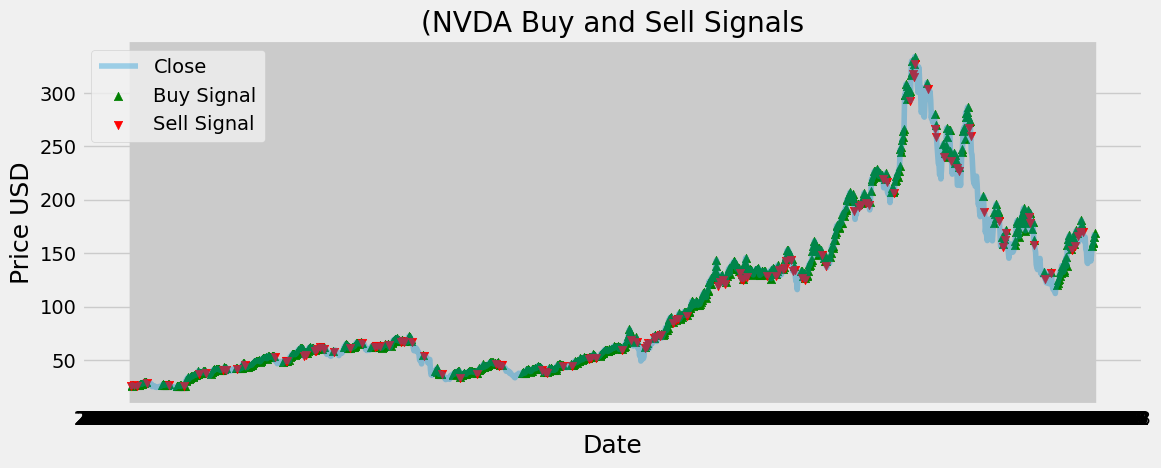

NFLX ./data\2023-01-17_NFLX.csv


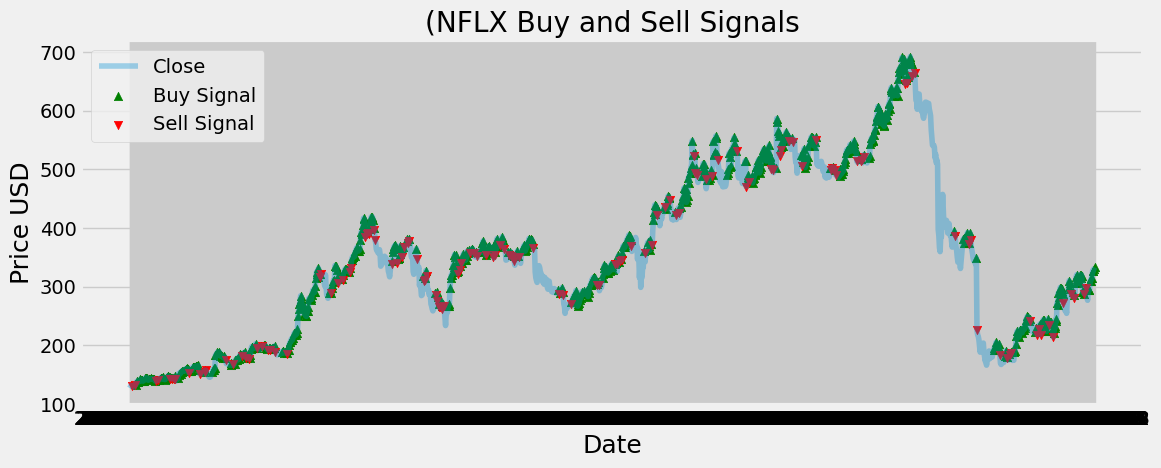

TSLA ./data\2023-01-17_TSLA.csv


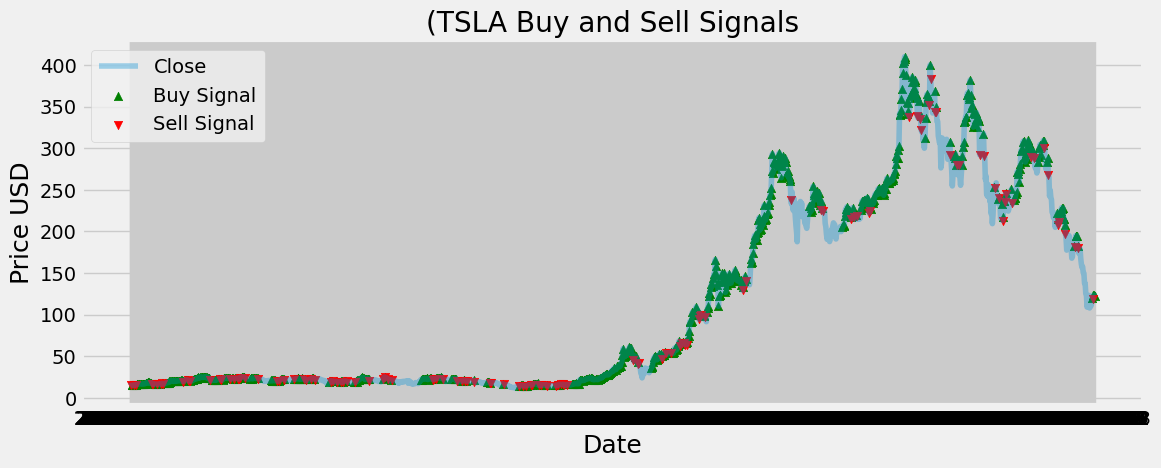

AMZN ./data\2023-01-17_AMZN.csv


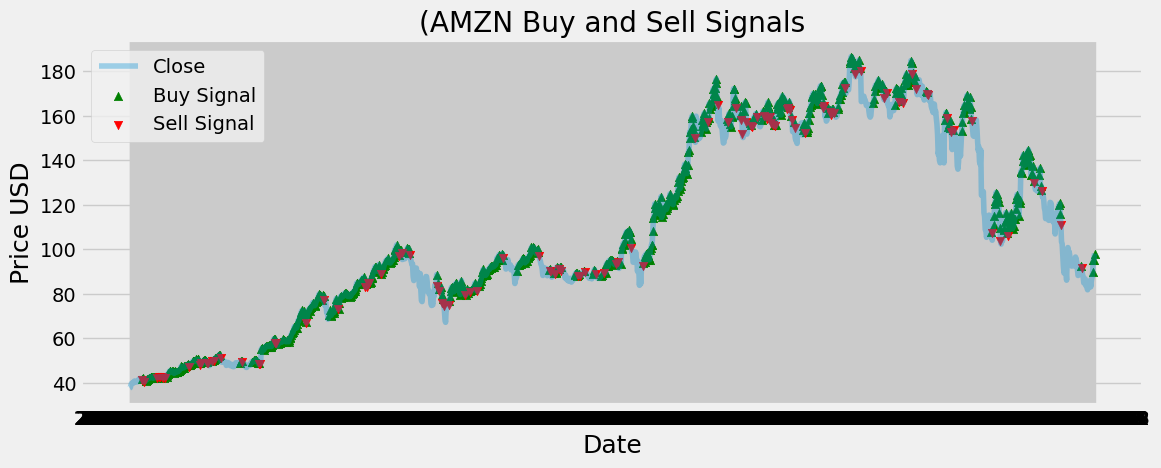

MSFT ./data\2023-01-17_MSFT.csv


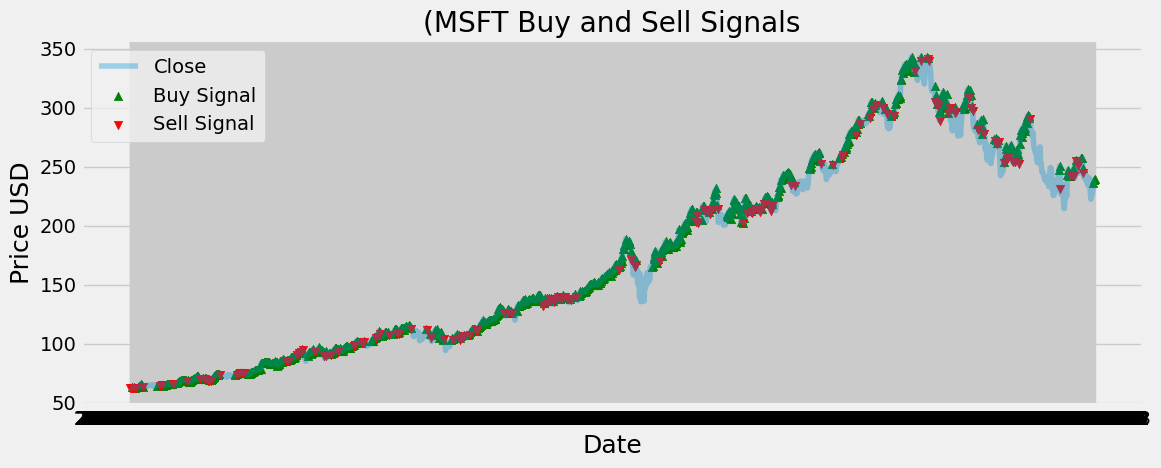

GOOGL ./data\2023-01-17_GOOGL.csv


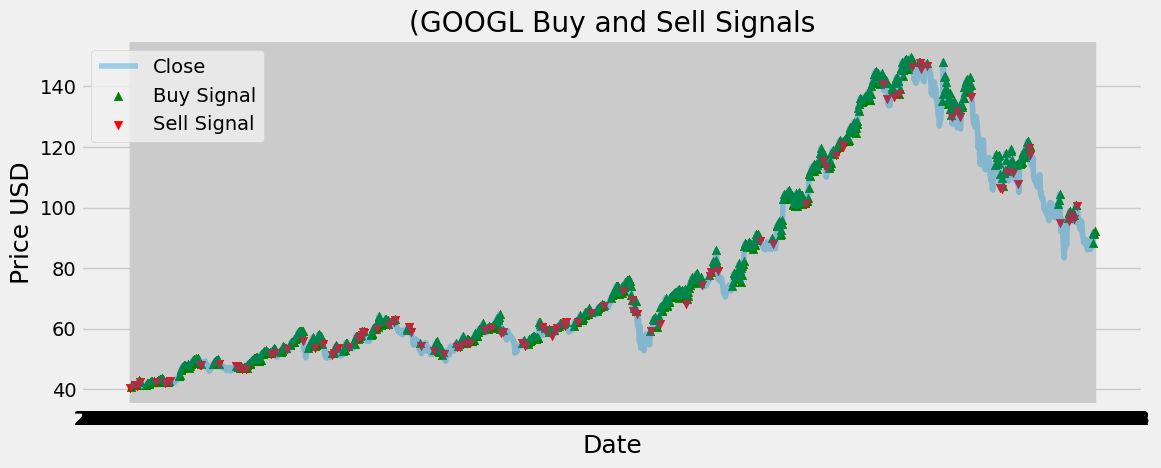

META ./data\2023-01-17_META.csv


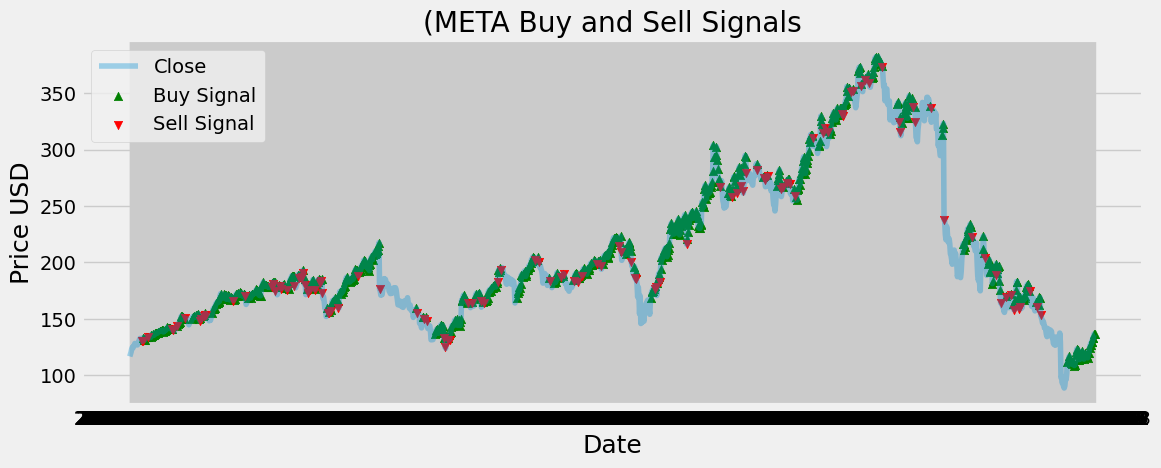

AAPL ./data\2023-01-17_AAPL.csv


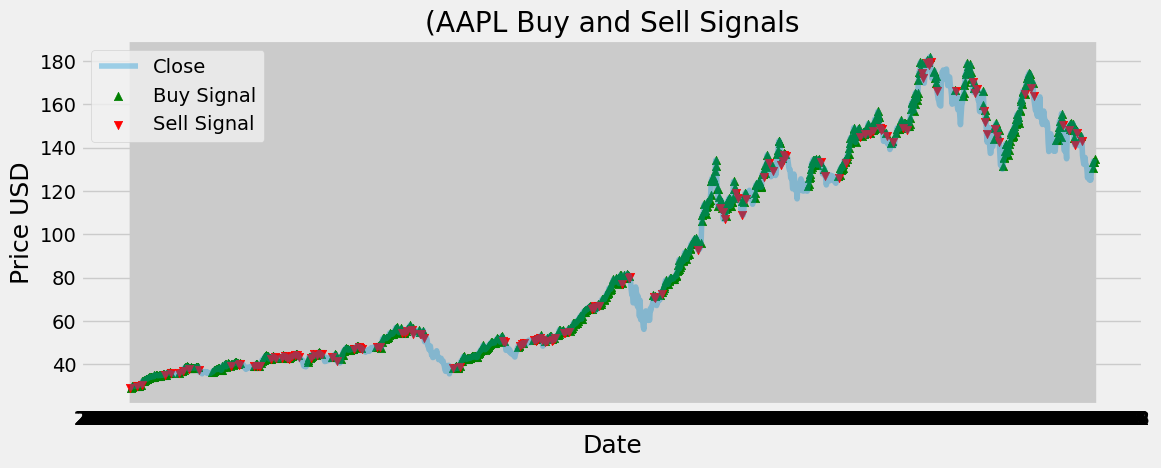

No file found with the string 'None' in the filename
No file found with the string 'None' in the filename


In [7]:
stock_data_files = glob.glob(f"{data_dir}/*.csv")
bigtech = [ 'NVDA', 'NFLX', 'TSLA', 'AMZN', 'MSFT', 'GOOGL', 'META', 'AAPL', 'BIDU', 'BABA']

# Example usage
for ticker in bigtech:
    file = find_file(data_dir, ticker)
    if file:
        print(ticker, file)
        bullish_or_bearish_using_OBV(ticker, file)
    else:
        print("No file found with the string '{}' in the filename".format(file))


In [4]:
google = yf.Ticker("GOOG")
df = google.history() # period='1d', interval="1m"
df['Date'] = pd.to_datetime(df.index).date # .time 
df.set_index('Date', inplace=True) 
# Save to CSV
df.to_csv("stock_data.csv")
df.head()

data_dir = "./data"
stock_data_files = glob.glob(f"{data_dir}/*.csv")

In [ ]:



X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

In [9]:
import yfinance as yf
google = yf.Ticker("GOOG")

#df = google.history(period='1d', interval="1m")
df = google
print(df.head())

import pandas as pd

df['날짜'] = pd.to_datetime(df.index).time 

df.set_index('날짜', inplace=True) 

df.head()

X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

import matplotlib.pyplot as plt
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

from plotly.offline import plot
import plotly.graph_objs as go

df = pd.read_csv('./output.csv')

o = df['open'].astype(float)
h = df['high'].astype(float)
l = df['low'].astype(float)
c = df['Close'].astype(float)

trace = go.Candlestick(
            open=o,
            high=h,
            low=l,
            Close=c)
data = [trace]
plot(data, filename='go_candle1.html')